In [6]:
# Import libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Measuring cluster quality

In [14]:
# Exploring the dataset 
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.shape

(200, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.duplicated().sum() # This means no need to clean this dataset

0

In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1600x1000 with 0 Axes>

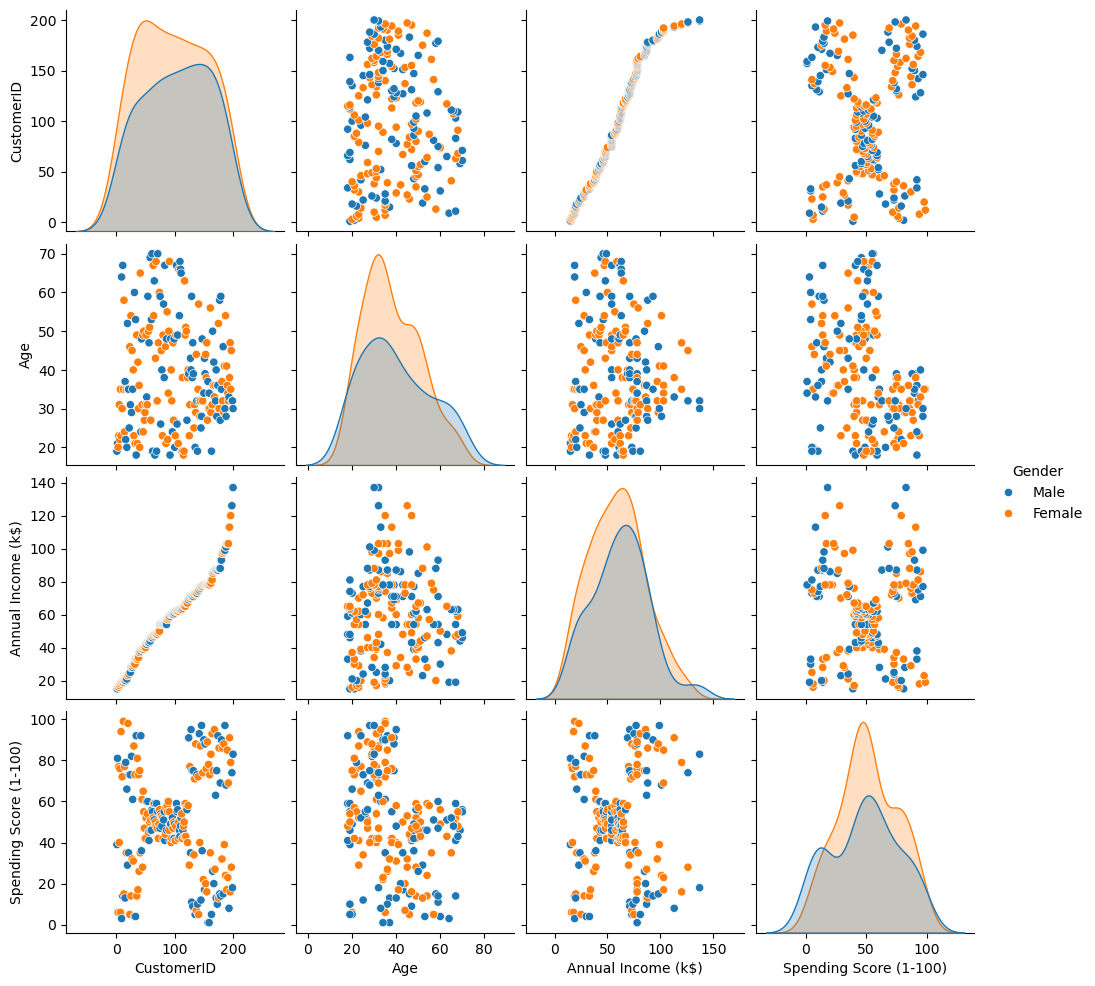

In [26]:
# Data exploration and visualization 
# Relationships between features in a dataset
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

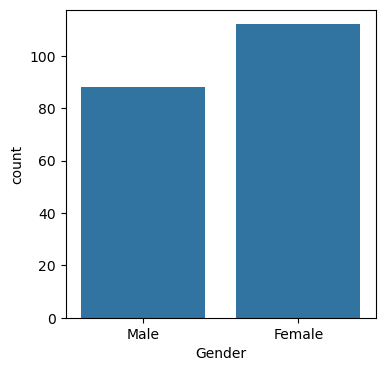

In [28]:
# No of male v/s female
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show

C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_24920\558234079.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_24920\558234079.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\Vyshnavi\AppData\Local\

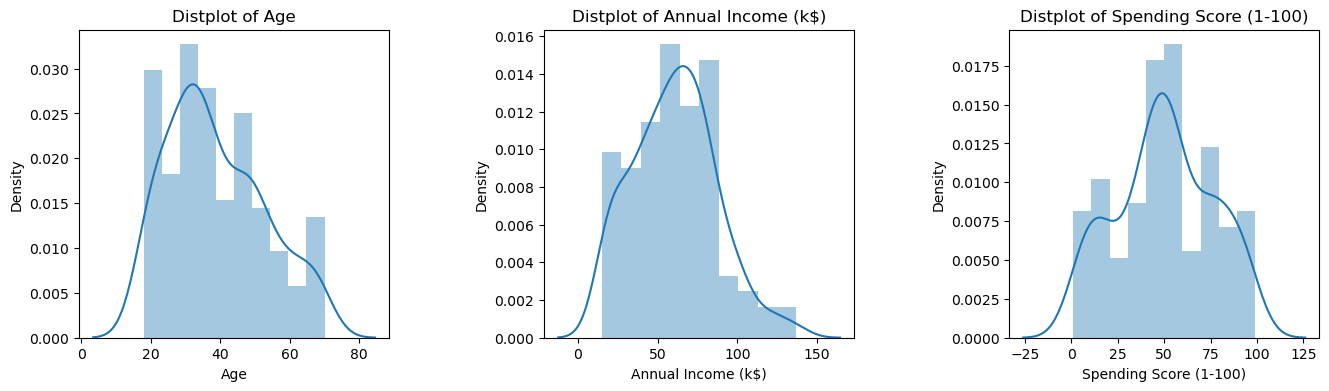

In [30]:
# Distribution of numerical features
plt.figure(1, figsize=(16,4))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [32]:
# Clustering using K-means
# Elbow method 
X = df.iloc[:, -2:]

C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

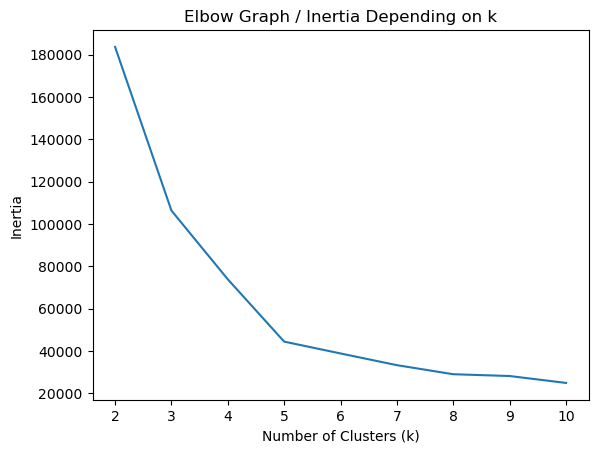

In [44]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('Elbow Graph / Inertia Depending on k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

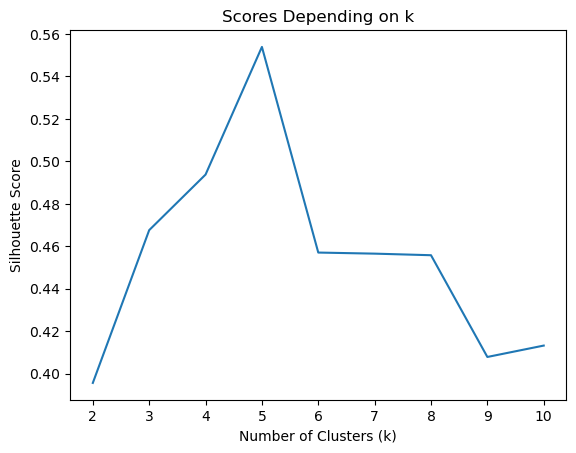

In [52]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('Scores Depending on k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [54]:
# Applying K-means on more than 2 feature 
X = df.iloc[:, -3:]

C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

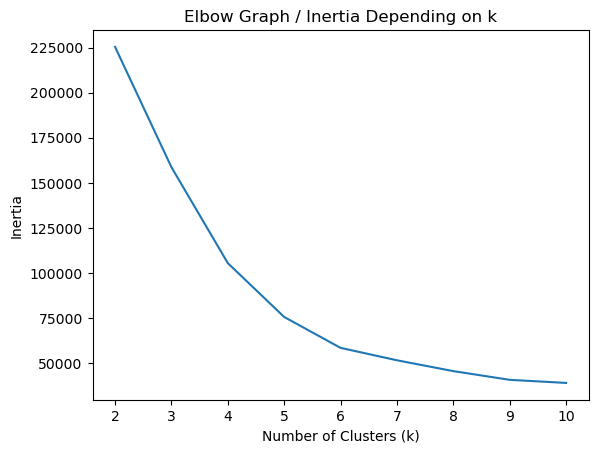

In [58]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('Elbow Graph / Inertia Depending on k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

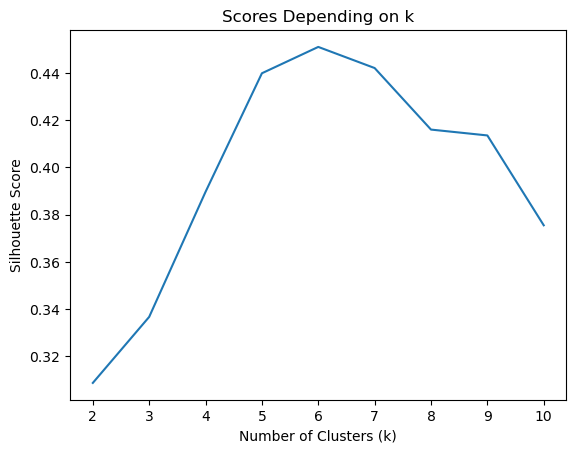

In [62]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('Scores Depending on k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [64]:
km = KMeans(n_clusters=5).fit(X)

C:\Users\Vyshnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


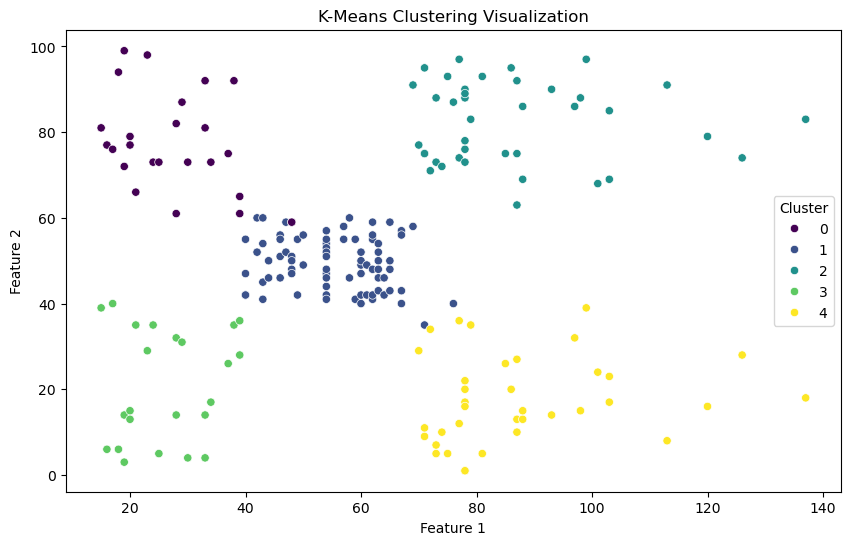

In [68]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

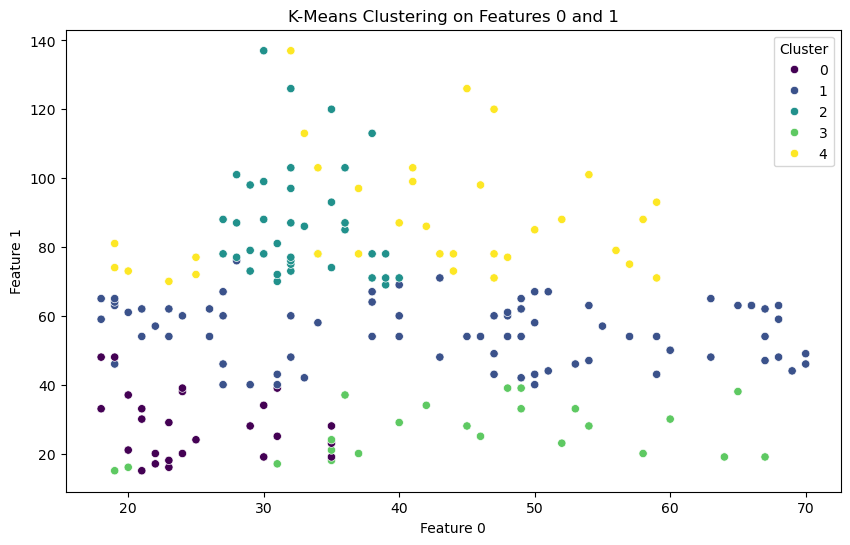

In [70]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_, palette='viridis')
plt.title('K-Means Clustering on Features 0 and 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

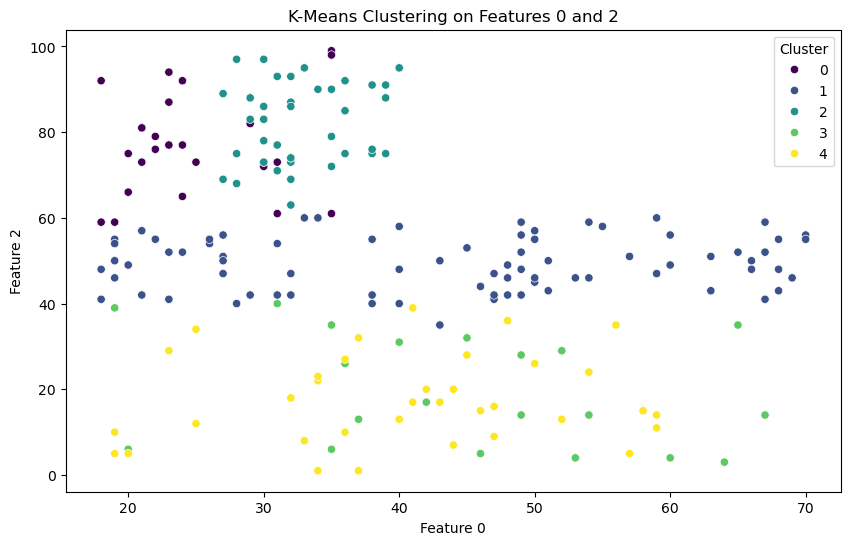

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.title('K-Means Clustering on Features 0 and 2')
plt.xlabel('Feature 0')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

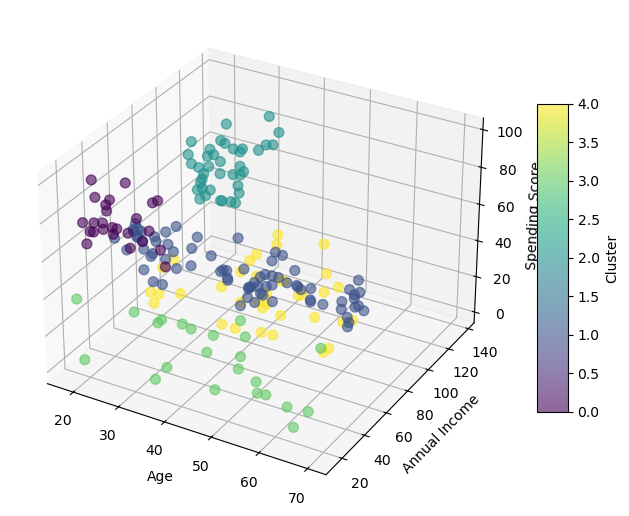

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Creating a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  

# Extracting the data
xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

# Plotting the points
scatter = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='viridis')

# Setting axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Adding a color bar for better visualization
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cluster')

# Display the plot
plt.show()


In [78]:
# Definition of customers profiles corresponding to each clusters
# Profiles of customers
X['label'] = km.labels_

In [80]:
X.label.value_counts()

label
1    77
2    39
4    36
0    25
3    23
Name: count, dtype: int64

In [90]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
         Age  Annual Income (k$)  Spending Score (1-100)
count  25.00               25.00                    25.0
mean   24.96               28.04                    77.0
min    18.00               15.00                    59.0
max    35.00               48.00                    99.0



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  77.000000           77.000000               77.000000
mean   43.727273           55.480519               49.324675
min    18.000000           40.000000               35.000000
max    70.000000           76.000000               60.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 3
             Age  Annual Income (k$)

In [92]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,77.000000,77.000000,77.000000
mean,43.727273,55.480519,49.324675
min,18.000000,40.000000,35.000000
max,70.000000,76.000000,60.000000
